<a href="https://colab.research.google.com/github/sayanghorui/samplecode/blob/master/Convnet_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Preprocessing

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Using TensorFlow backend.


In [0]:
train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/ML_datasets/cats_and_dogs_small/train',
                                                    target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [0]:
validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/ML_datasets/cats_and_dogs_small/validation',
                                                    target_size=(150, 150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


### Model Architecture:

In [0]:
from keras import layers, models
from keras import optimizers

Using TensorFlow backend.


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

### Compile Model:

In [0]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

NameError: ignored

### Fitting the model and saving:

In [0]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)




Epoch 1/30





100/100 [==============================] - 779s 8s/step - loss: 0.6914 - acc: 0.5260 - val_loss: 0.6741 - val_acc: 0.5920
Epoch 2/30
100/100 [==============================] - 111s 1s/step - loss: 0.6657 - acc: 0.6030 - val_loss: 0.6603 - val_acc: 0.5950
Epoch 3/30
100/100 [==============================] - 110s 1s/step - loss: 0.6332 - acc: 0.6615 - val_loss: 0.6358 - val_acc: 0.6330
Epoch 4/30
100/100 [==============================] - 111s 1s/step - loss: 0.5966 - acc: 0.6855 - val_loss: 0.6439 - val_acc: 0.6210
Epoch 5/30
100/100 [==============================] - 111s 1s/step - loss: 0.5480 - acc: 0.7250 - val_loss: 0.5993 - val_acc: 0.6780
Epoch 6/30
100/100 [==============================] - 111s 1s/step - loss: 0.5197 - acc: 0.7310 - val_loss: 0.6268 - val_acc: 0.6650
Epoch 7/30
100/100 [==============================] - 111s 1s/step - loss: 0.4859 - acc: 0.7690 - val_loss: 0.5804 - val_acc: 0.6990
Epoch 8/30
100/100 [==============================] - 111s 1s

In [0]:
model.save('cats_and_dogs_small_1.h5')

### Plotting Training and Validation Loss and Accuracy

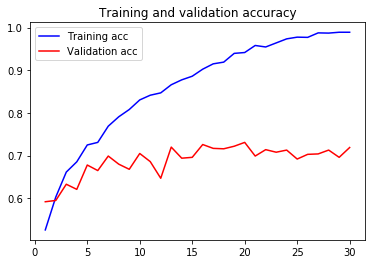

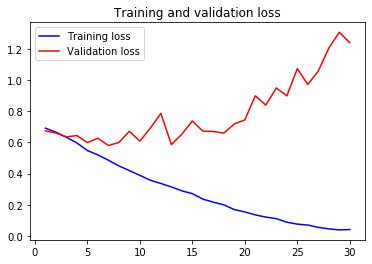

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### **Creating a new model with Image Augmentation and regularization**

In [0]:
model_new = models.Sequential()

model_new.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model_new.add(layers.MaxPooling2D((2, 2)))
model_new.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_new.add(layers.MaxPooling2D((2, 2)))
model_new.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_new.add(layers.MaxPooling2D((2, 2)))
model_new.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_new.add(layers.MaxPooling2D((2, 2)))
model_new.add(layers.Flatten())
model_new.add(layers.Dropout(0.5))
model_new.add(layers.Dense(512, activation='relu'))
model_new.add(layers.Dense(1, activation='sigmoid'))

model_new.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                   shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/ML_datasets/cats_and_dogs_small/train',
                                                    target_size=(150, 150),batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/ML_datasets/cats_and_dogs_small/validation',
                                                        target_size=(150, 150),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model_new.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)